In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/celeba-dataset


In [7]:
import pandas as pd 

df = pd.read_csv("/kaggle/input/celeba-dataset/list_attr_celeba.csv", delimiter=",")


In [32]:
# image_id
# Smiling
df2 = df[['image_id', 'Smiling']].copy()

In [38]:
df2.replace({-1 : 0},  inplace=True)

In [40]:
df2.head(3)

,image_id,Smiling
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,0


In [14]:
from torch.utils.data import Dataset, DataLoader

In [48]:
import os 
target_folder = "/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/"
os.listdir(target_folder)

['083648.jpg',
 '168202.jpg',
 '125778.jpg',
 '059339.jpg',
 '032501.jpg',
 '160139.jpg',
 '046754.jpg',
 '178961.jpg',
 '123482.jpg',
 '039337.jpg',
 '130301.jpg',
 '089474.jpg',
 '169197.jpg',
 '109841.jpg',
 '102631.jpg',
 '149341.jpg',
 '042195.jpg',
 '157069.jpg',
 '127474.jpg',
 '011035.jpg',
 '163198.jpg',
 '197574.jpg',
 '099715.jpg',
 '104821.jpg',
 '140120.jpg',
 '099103.jpg',
 '128808.jpg',
 '191289.jpg',
 '109629.jpg',
 '040257.jpg',
 '076358.jpg',
 '054361.jpg',
 '031167.jpg',
 '042233.jpg',
 '098863.jpg',
 '100229.jpg',
 '049288.jpg',
 '197046.jpg',
 '058266.jpg',
 '010011.jpg',
 '095100.jpg',
 '031392.jpg',
 '087168.jpg',
 '185335.jpg',
 '190781.jpg',
 '099155.jpg',
 '169660.jpg',
 '015658.jpg',
 '056905.jpg',
 '176264.jpg',
 '057402.jpg',
 '032667.jpg',
 '134089.jpg',
 '044746.jpg',
 '198792.jpg',
 '199519.jpg',
 '045927.jpg',
 '046911.jpg',
 '115559.jpg',
 '122899.jpg',
 '059936.jpg',
 '094117.jpg',
 '112241.jpg',
 '185168.jpg',
 '071057.jpg',
 '130548.jpg',
 '112778.j

In [112]:
import os 
from PIL import Image
target_folder = "/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/"
file = "/kaggle/input/celeba-dataset/list_attr_celeba.csv"
class FaceImage(Dataset):
    def __init__(self, label_file, img_dir, transform=None):
        df = pd.read_csv(label_file, delimiter=",")
        self.labels  = df[['image_id', 'Smiling']].copy()
        self.img_dir = img_dir
        self.transform = transform

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.labels.iloc[idx,0] ) 
        img = Image.open(img_path).convert("RGB")
        label = self.labels.iloc[idx,1]

        if self.transform:
            img = self.transform(img)
            
        return img, label 

    def __len__(self):
        return self.labels.shape[0]
    

In [113]:
trans = transforms.Compose(
    [
        transforms.Resize((64,64)),
        transforms.ToTensor()
    ]
)
data = FaceImage(file,target_folder, trans  )

In [115]:
tmp_img, tmp_label = data[4596]

In [117]:
type(tmp_img)

torch.Tensor

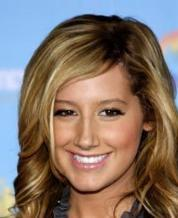

In [76]:
tmp_img

In [60]:
#target_folder + df2.iloc[0,0]
import os 
os.path.join(target_folder, df2.iloc[0,0] )

'/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba/000001.jpg'

In [51]:
data = FaceImage(file,target_folder )

In [83]:
len(data)

202599

In [82]:
sum([141819, 20261, 40519])

202599

In [118]:
from torch.utils.data import random_split
import torch 
gen = torch.Generator().manual_seed(42)
train_dataset, val_dataset, test_dataset = random_split(data, [141819, 20261, 40519],
                                        generator=gen)

In [119]:
from torch.utils.data import DataLoader
from torchvision import transforms

In [120]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

In [121]:
a = iter(train_loader)

In [122]:
tmp = next(a)

In [125]:
tmp[0].shape

torch.Size([32, 3, 64, 64])